## Regularization

### L2正則(重み減衰)をスクラッチ実装

In [38]:
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
from torch import nn, optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

%load_ext autoreload
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [5]:
torch.linalg.norm(X)

tensor(9.5394)

In [11]:
torch.sqrt(torch.sum(X**2))

tensor(9.5394)

In [27]:
def get_conv_model():
    return nn.Sequential(
    # 3x28x28
    nn.Conv2d(3, 4, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 4x14x14
    nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 8x7x7
    nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 16x4x4
    nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # 32x2x2 -> GAP -> 32 x 1 x 1
    
    nn.Flatten(),
    # # 128 -> 32
    nn.Linear(128, 10)
    # nn.Linear(32, 10)
    # 10
)

In [16]:
l2_reg = torch.tensor(0.)
for name, param in conv_model.named_parameters():
    # print(name, param)
    if 'weight' in name:
        l2_reg += torch.linalg.norm(param)**2
# loss += (weight_decay / (2*m)) * l2_reg

### PytorchでのL2正則

In [19]:
optim.SGD(conv_model.parameters(), lr=0.03, weight_decay=0.01)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.01
)

### L2正則の有無でモデル比較

In [35]:
conv_model = get_conv_model()
conv_model_l2 = get_conv_model()
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # CIFAR10用
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
train_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)

opt = optim.SGD(conv_model.parameters(), lr=0.03)
opt_l2 = optim.SGD(conv_model_l2.parameters(), lr=0.03, weight_decay=0.001)

Files already downloaded and verified
Files already downloaded and verified


In [36]:
num_epoch = 20
train_losses, val_losses, val_accuracies = utils.learn(conv_model, train_loader, val_loader, opt, F.cross_entropy, num_epoch=num_epoch)
train_losses_l2, val_losses_l2, val_accuracies_l2 = utils.learn(conv_model_l2, train_loader, val_loader, opt_l2, F.cross_entropy, num_epoch=num_epoch)

epoch: 0: train error: 2.2246250898941704, validation error: 2.080264696592017, validation accuracy: 0.24693433544303797


epoch: 1: train error: 1.9966881845308386, validation error: 1.9009313975708395, validation accuracy: 0.2983583860759494


epoch: 2: train error: 1.8241069036371567, validation error: 1.7330490969404388, validation accuracy: 0.3861748417721519


epoch: 3: train error: 1.6870894532679293, validation error: 1.6355544011804122, validation accuracy: 0.41663370253164556


epoch: 4: train error: 1.6135314910308174, validation error: 1.5801331966738157, validation accuracy: 0.42592958860759494


epoch: 5: train error: 1.5606963585709672, validation error: 1.5498074383675298, validation accuracy: 0.4408623417721519


epoch: 6: train error: 1.5223685536543121, validation error: 1.501591854457614, validation accuracy: 0.4675632911392405


epoch: 7: train error: 1.4859035902316002, validation error: 1.5075445974929422, validation accuracy: 0.4677610759493671


epoch: 8: train error: 1.4579774815103281, validation error: 1.5641641601731506, validation accuracy: 0.43947784810126583


epoch: 9: train error: 1.4344490242126349, validation error: 1.4131576592409159, validation accuracy: 0.4922863924050633


epoch: 10: train error: 1.4136724203748776, validation error: 1.4362744953058943, validation accuracy: 0.4775514240506329


epoch: 11: train error: 1.3934568483811205, validation error: 1.4632086044625392, validation accuracy: 0.48269382911392406


epoch: 12: train error: 1.3773677644827176, validation error: 1.395505488673343, validation accuracy: 0.4975276898734177


epoch: 13: train error: 1.3630376886528777, validation error: 1.3725146628633331, validation accuracy: 0.5106803797468354


epoch: 14: train error: 1.3478073070726126, validation error: 1.3787605566314505, validation accuracy: 0.5076147151898734


epoch: 15: train error: 1.3366520636526824, validation error: 1.3472413880915581, validation accuracy: 0.5143393987341772


epoch: 16: train error: 1.3251440799449716, validation error: 1.332213593434684, validation accuracy: 0.5216574367088608


epoch: 17: train error: 1.3140707543438963, validation error: 1.3580919473986082, validation accuracy: 0.5117681962025317


epoch: 18: train error: 1.3014158129387194, validation error: 1.4443409442901611, validation accuracy: 0.49179193037974683


epoch: 19: train error: 1.2890535873525284, validation error: 1.3146359181102318, validation accuracy: 0.5259098101265823


epoch: 0: train error: 2.273727035888321, validation error: 2.1603981513011306, validation accuracy: 0.22132120253164558


epoch: 1: train error: 2.0405923076297925, validation error: 1.9272692671305016, validation accuracy: 0.29420490506329117


epoch: 2: train error: 1.9085314170173977, validation error: 1.8483465683611133, validation accuracy: 0.32308148734177217


epoch: 3: train error: 1.8021562901299324, validation error: 1.728266291980502, validation accuracy: 0.37885680379746833


epoch: 4: train error: 1.700273092140627, validation error: 1.6492412920239605, validation accuracy: 0.41445806962025317


epoch: 5: train error: 1.6262403089372093, validation error: 1.6169688067858732, validation accuracy: 0.4345332278481013


epoch: 6: train error: 1.5731172000660616, validation error: 1.527233383323573, validation accuracy: 0.46251977848101267


epoch: 7: train error: 1.5308764877221774, validation error: 1.5021965096268473, validation accuracy: 0.46954113924050633


epoch: 8: train error: 1.4976888757837399, validation error: 1.4978228234037567, validation accuracy: 0.47151898734177217


epoch: 9: train error: 1.466552003875108, validation error: 1.4939811033538626, validation accuracy: 0.4642009493670886


epoch: 10: train error: 1.4455951010174763, validation error: 1.4439670451079742, validation accuracy: 0.4864517405063291


epoch: 11: train error: 1.420304129190762, validation error: 1.4365169398392303, validation accuracy: 0.48961629746835444


epoch: 12: train error: 1.40476769102199, validation error: 1.4156904929800878, validation accuracy: 0.496934335443038


epoch: 13: train error: 1.3832101239572705, validation error: 1.403738181802291, validation accuracy: 0.4963409810126582


epoch: 14: train error: 1.369434819501989, validation error: 1.407750055759768, validation accuracy: 0.497626582278481


epoch: 15: train error: 1.3589552512864018, validation error: 1.3776057868064204, validation accuracy: 0.5136471518987342


epoch: 16: train error: 1.3437765336707426, validation error: 1.3660375257081623, validation accuracy: 0.5141416139240507


epoch: 17: train error: 1.3319832324371923, validation error: 1.3670103534867493, validation accuracy: 0.5088014240506329


epoch: 18: train error: 1.3237982281028766, validation error: 1.3461237406428856, validation accuracy: 0.5204707278481012


epoch: 19: train error: 1.3113191027165678, validation error: 1.3649867652337762, validation accuracy: 0.5124604430379747


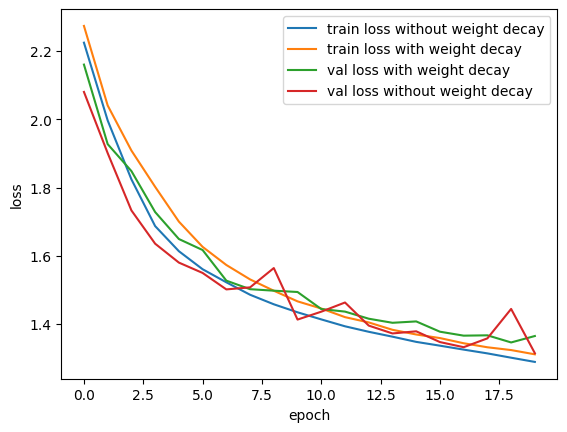

In [42]:

plt.plot(train_losses, label='train loss without weight decay')
plt.plot(train_losses_l2, label='train loss with weight decay')
plt.plot(val_losses_l2, label='val loss with weight decay')
plt.plot(val_losses, label='val loss without weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Dropout

### Dropoutスクラッチ実装

In [85]:
def dropout(X, drop_p):
    keep_p = 1 - drop_p
    mask = torch.rand(X.shape) < keep_p
    return X * mask / keep_p

In [86]:
X = torch.randn((100, 100))
droped_X = dropout(X, 0.3)

In [87]:
droped_X

tensor([[ 3.5037, -2.3092,  0.0000,  ..., -1.5941, -3.1091,  0.1775],
        [-2.0106, -2.2587,  1.4425,  ..., -1.9002,  0.4735,  1.0987],
        [-2.2269,  2.1493, -0.8432,  ...,  1.2416, -1.6369, -0.0000],
        ...,
        [ 0.0000, -1.6361,  2.6275,  ...,  1.7669, -1.7954, -0.0000],
        [ 1.5061,  0.8856, -1.5497,  ..., -1.0820, -0.2844, -1.4572],
        [-0.0000,  0.5236,  1.7422,  ...,  0.2194,  1.7398, -1.6336]])

In [77]:
mask = torch.rand(X.shape) < keep_p

In [80]:
X * mask / keep_p

tensor([[ 9.2728, -0.0000, -0.0000,  ...,  0.0000,  0.0000, -0.0000],
        [ 4.1800, -0.0000, -0.0000,  ..., -0.0000, -0.0000,  0.0000],
        [-5.2948,  0.0000,  1.1391,  ..., -0.0000,  0.0000, -1.5241],
        ...,
        [-0.0000,  2.6783,  0.8299,  ..., -0.0000, -0.0000,  0.0000],
        [ 1.5349, -5.4385,  0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [-0.3661, -0.0000, -0.0000,  ...,  3.5400, -0.0000,  7.6866]])

In [67]:
def relu(X):
    return torch.clamp(X, min=0)

In [70]:
relu_out = relu(X)
(relu_out * mask).sum() / keep_p

tensor(3708.3809)

In [69]:
relu_out.sum()

tensor(3937.4744)

### nn.Dropout

In [89]:
model = nn.Sequential(
    nn.Linear(64, 20),
    nn.ReLU(),
    nn.Dropout(p=0.4),
    nn.Linear(20, 10)
)

In [90]:
model

Sequential(
  (0): Linear(in_features=64, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=20, out_features=10, bias=True)
)